In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("messages.csv")

data.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [26]:
data.tail()

,message,label,length
2888,hello thanks for stopping by ! ! we have taken...,1,262
2889,"the list owner of : "" kiddin "" has invited you...",1,2163
2890,"judging from the return post , i must have sou...",0,1039
2891,gotcha ! there are two separate fallacies in t...,0,2949
2892,hello ! i ' m working on a thesis concerning a...,0,700


In [27]:
data.describe()

,label,length
count,2893.000000,2893.000000
mean,0.166263,3230.122019
std,0.372381,3654.605695
min,0.000000,17.000000
25%,0.000000,954.000000
50%,0.000000,2026.000000
75%,0.000000,4039.000000
max,1.000000,28649.000000


In [24]:
# Checking datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  2893 non-null   object
 1   label    2893 non-null   int64 
 2   length   2893 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 67.9+ KB


In [20]:
# Checking null values 
data.isnull().sum()

subject    62
message     0
label       0
length      0
dtype: int64

In [22]:
# Drop null values 
data.dropna(axis=1,inplace=True)

In [23]:
# Checking length of the masseges
data['length'] = data['message'].apply(len)
data.head()

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB9B39C488>,
      dtype=object)

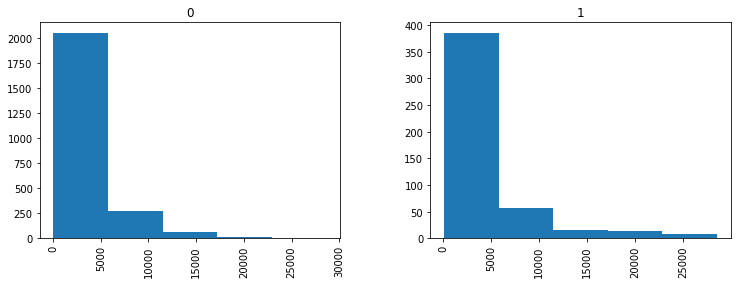

In [19]:
# plot masseges length and label 
data.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [10]:
def pre_process(message):
    
    text = message.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in message.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [12]:
# Vectorize our massges data & Splitting that data in test and train 
textFeatures = data['message'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

features_train, features_test, labels_train, labels_test = train_test_split(features, data['label'], test_size=0.3, random_state=111)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [13]:
# Applying svc to predict our model ..............
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
accuracy_score(labels_test,prediction)

0.9942396313364056

In [14]:
# Applying MultinomialNB to predict our data ........
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.2)
mnb.fit(features_train, labels_train)
prediction = mnb.predict(features_test)
accuracy_score(labels_test,prediction)


0.9769585253456221

In [16]:
from sklearn.metrics import classification_report
print (classification_report(labels_test, prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       733
           1       1.00      0.85      0.92       135

    accuracy                           0.98       868
   macro avg       0.99      0.93      0.95       868
weighted avg       0.98      0.98      0.98       868



In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(labels_test,prediction))

[[733   0]
 [ 20 115]]


In [ ]:
## Svc model gives high accuracy as compared to multinomial naive bayes..
